<a href="https://colab.research.google.com/github/generative-world/deep-learning-examples/blob/master/cnn/notebooks/cnn_image_predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset, info = tfds.load('horses_or_humans', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.1E53L4_3.0.0/horses_or_humans-train.tfrecord*.…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.1E53L4_3.0.0/horses_or_humans-test.tfrecord*..…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [3]:
train_data,validation_data = dataset['train'],dataset['test']

In [4]:
def preprocess(image, label):
  image =  tf.image.resize(image,(150,150))
  image = image/255
  return image, label

In [5]:
train_data = train_data.map(preprocess).batch(32).shuffle(100)
validation_data = validation_data.map(preprocess).batch(32)

In [6]:
print('Building Convolutional Neural Network')
model = Sequential([
    Input(shape=(150,150,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')

])

Building Convolutional Neural Network


In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 143ms/step - accuracy: 0.6371 - loss: 0.7029 - val_accuracy: 0.8828 - val_loss: 0.3897
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8836 - loss: 0.2647 - val_accuracy: 0.8555 - val_loss: 1.1872
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9733 - loss: 0.0917 - val_accuracy: 0.8125 - val_loss: 1.5401
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9839 - loss: 0.0334 - val_accuracy: 0.8594 - val_loss: 1.2983
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9888 - loss: 0.0379 - val_accuracy: 0.8281 - val_loss: 1.6882
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9808 - loss: 0.0499 - val_accuracy: 0.8438 - val_loss: 1.9389
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9974 - loss: 0.0154 - val_accuracy: 0.8867 - val_loss: 1.2835
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9964 - loss: 0.0073 - val_accuracy: 0.8711 -

In [8]:
model.save('horse_human_cnn.h5')

In [9]:
history.history['accuracy']

[0.7487828731536865,
 0.9074975848197937,
 0.9707887172698975,
 0.9863680601119995,
 0.9766309857368469,
 0.984420657157898,
 0.9970788955688477,
 0.9970788955688477,
 0.9990262985229492,
 0.9990262985229492]

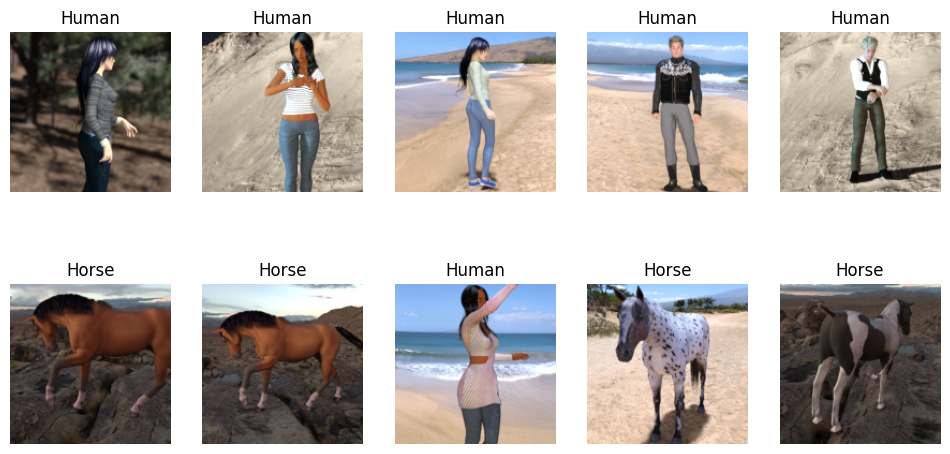

In [10]:
def display_sample(dataset,class_names,num_samples=5):
  plt.figure(figsize=(12,6))
  count = 0
  for images,labels in dataset.take(1):
    for i in range(num_samples*2):
      ax = plt.subplot(2,num_samples,i+1)
      plt.imshow(images[i].numpy())
      plt.title(class_names[int(labels[i].numpy())])
      plt.axis('off')
      ax.set_title(class_names[labels[i]])
      ax.axis('off')
      count += 1
      if count == num_samples * 2:
        break
class_names = ['Horse','Human']
display_sample(train_data,class_names)

In [ ]:
def preprocess_single_image(image_path):
  img =tf.keras.utils.load_img(image_path,target_size=(150,150))
  img = tf.keras.utils.img_to_array(img)
  img = img/255.0
  img_array = np.expand_dims(img,axis=0)
  return img_array

In [ ]:
sample_image_path = '/content/horse45-3.png'
preprocessed_image = preprocess_single_image(sample_image_path)
prediction = model.predict(preprocessed_image)